In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('housing.csv')


In [3]:
# Display the first few rows
print(data.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
# Getting basic statistics
print(data.describe())

# Checking data types and missing values
print(data.info())
print(data.isnull().sum())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [21]:
data.dropna(inplace=True) 

In [22]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


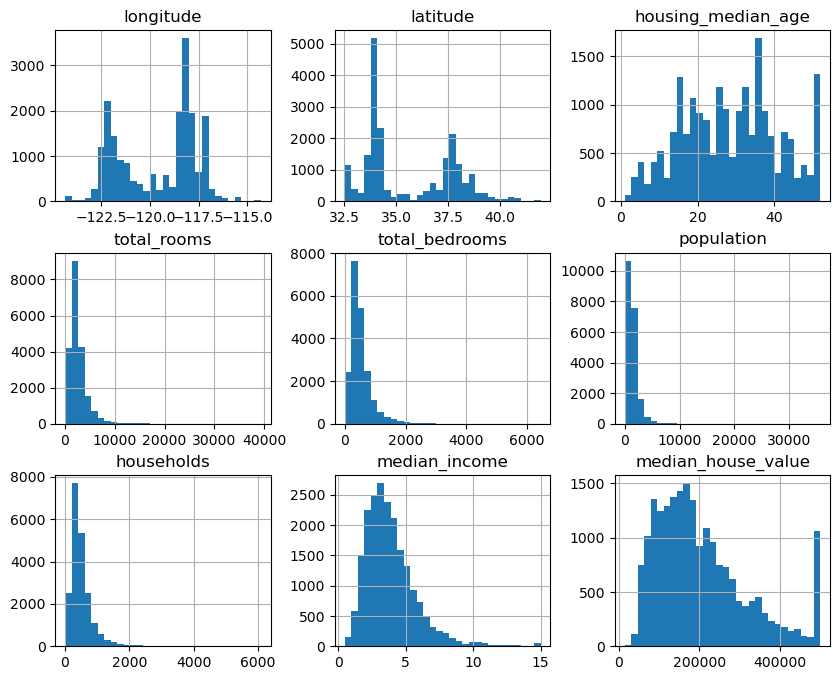

In [8]:
data.hist(figsize=(10, 8), bins=30)
plt.show()

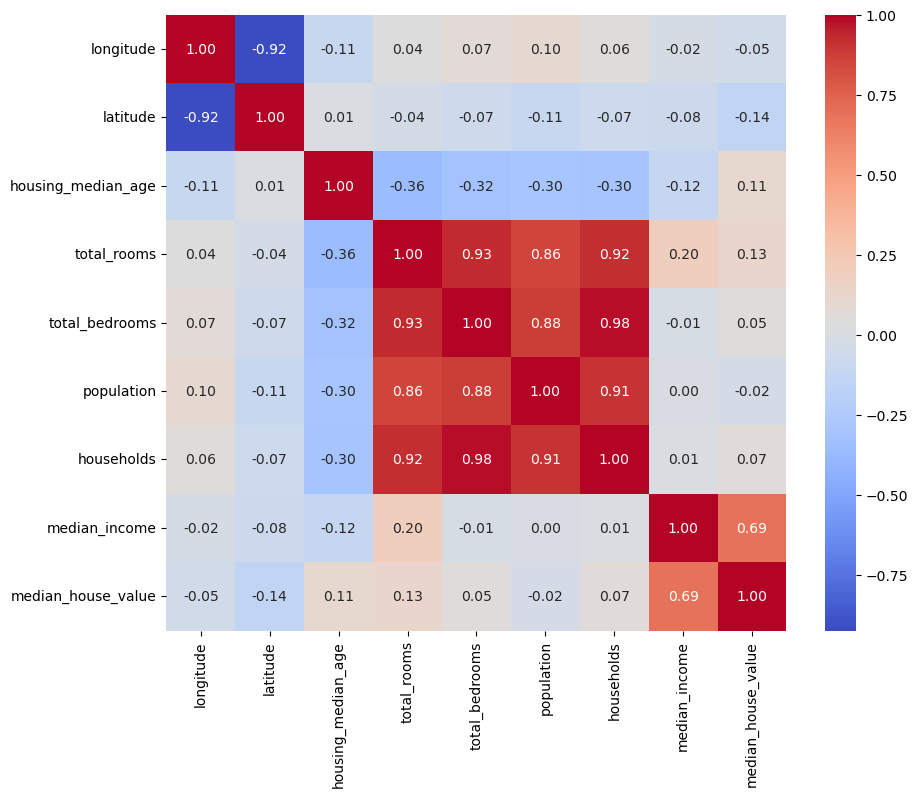

In [12]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Generate the correlation matrix and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

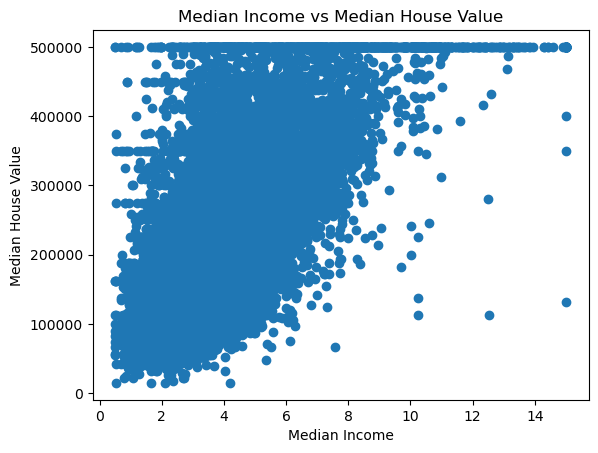

In [13]:
plt.scatter(data['median_income'], data['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value')
plt.show()

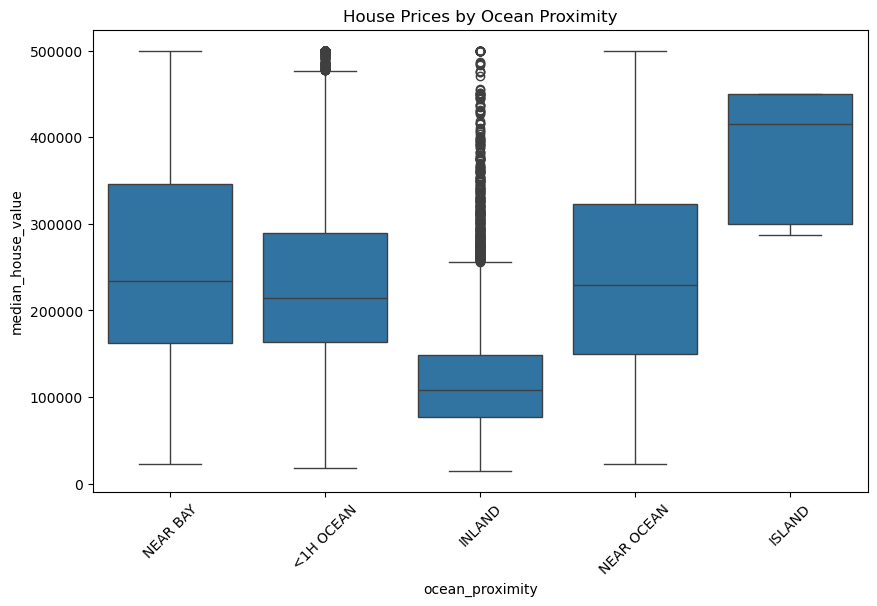

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.xticks(rotation=45)
plt.title('House Prices by Ocean Proximity')
plt.show()

In [15]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [16]:
from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Remove rows with missing values from training and test sets
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test_dropped.index]

# Train the model
lin_reg.fit(X_train_dropped, y_train_dropped)

# Make predictions
y_pred = lin_reg.predict(X_test_dropped)

# Evaluate the model
mse = mean_squared_error(y_test_dropped, y_pred)
rmse = np.sqrt(mse)
print(f"Linear Regression RMSE: {rmse}")


Linear Regression RMSE: 69503.58476936376


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_reg = RandomForestRegressor(random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest RMSE: 48945.40550492221


In [27]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)

# Train the model
dt_reg.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_reg.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print(f"Decision Tree RMSE: {rmse_dt}")

Decision Tree RMSE: 69632.78909461202


Linear Regression: 69503.58476936376
Random Forest: 48945.40550492221
Decision Tree: 69632.78909461202


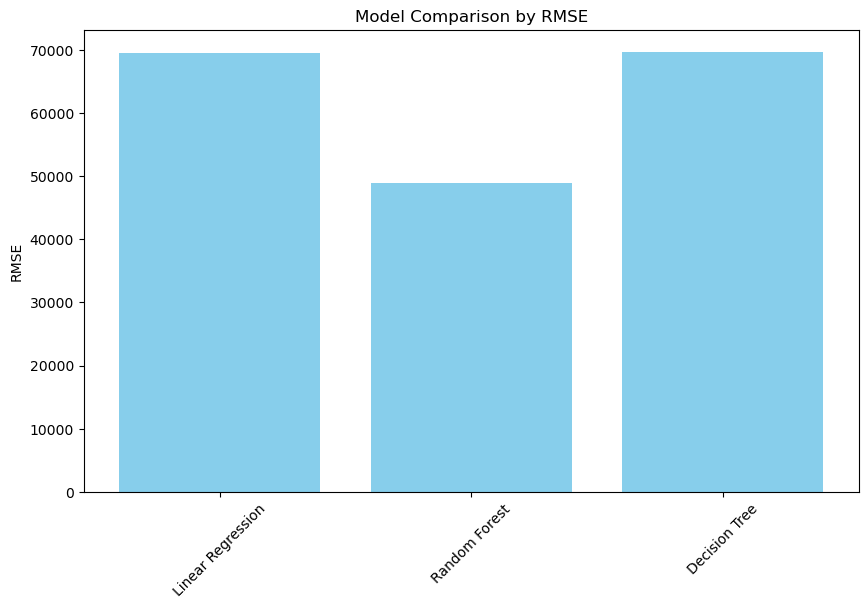

In [29]:
# Collect the RMSE values of all models
rmse_values = {
    'Linear Regression': rmse,
    'Random Forest': rmse_rf,
    'Decision Tree': rmse_dt
}

# Print RMSE for each model
for model, rmse_val in rmse_values.items():
    print(f"{model}: {rmse_val}")

# Plot the RMSE values for comparison
plt.figure(figsize=(10, 6))
plt.bar(rmse_values.keys(), rmse_values.values(), color='skyblue')
plt.ylabel('RMSE')
plt.title('Model Comparison by RMSE')
plt.xticks(rotation=45)
plt.show()
